In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# Load and preprocess data
# -----------------------------
df = pd.read_csv("Raw Data/P8_S1.csv")

# Drop 1back and 2back
df = df[~df['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])

# Binary label
df['binary_label'] = df['Label'].apply(lambda x: 1 if x in ['slightly', 'moderately', 'very'] else 0)

# Predictors and label
features = ['Physio_ECG','Physio_GSR','swAngle','laneDev_OffsetfrmLaneCentre','speed']
X = df[features]
y = df['binary_label'].values

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cnn = X_scaled.reshape(-1, X.shape[1], 1)

# Train/Val/Test Split
X_temp, X_test, y_temp, y_test = train_test_split(X_cnn, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# -----------------------------
# CNN Model Definition
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    BatchNormalization(),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),

    # Only one pooling layer
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# Train Model
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# -----------------------------
# Evaluation and Confusion Matrix
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Alert", "Drowsy"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# Training Curves
# -----------------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Raw Data/P8_S1.csv'

Epoch 1/5


/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37928/37928 ━━━━━━━━━━━━━━━━━━━━ 39s 993us/step - accuracy: 0.8650 - loss: 0.3252 - val_accuracy: 0.9086 - val_loss: 0.2339
Epoch 2/5
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 38s 993us/step - accuracy: 0.8852 - loss: 0.2782 - val_accuracy: 0.9181 - val_loss: 0.2091
Epoch 3/5
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 37s 978us/step - accuracy: 0.8910 - loss: 0.2650 - val_accuracy: 0.9203 - val_loss: 0.2005
Epoch 4/5
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 37s 982us/step - accuracy: 0.8943 - loss: 0.2572 - val_accuracy: 0.9247 - val_loss: 0.1958
Epoch 5/5
37928/37928 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.8965 - loss: 0.2519 - val_accuracy: 0.9259 - val_loss: 0.1922
10134/10134 ━━━━━━━━━━━━━━━━━━━━ 4s 350us/step - accuracy: 0.7321 - loss: 0.6502
Test Loss: 0.6502, Test Accuracy: 0.7321
10134/10134 ━━━━━━━━━━━━━━━━━━━━ 3s 290us/step


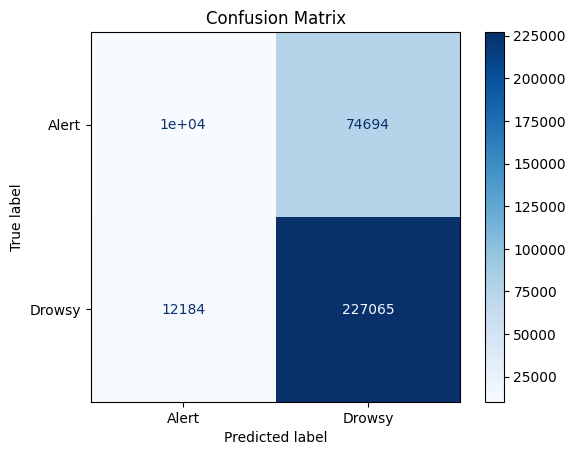

10134/10134 ━━━━━━━━━━━━━━━━━━━━ 3s 301us/step

Summary Metrics:

   Metric CNN (60Hz)
 Accuracy       0.73
  Wgt. F1       0.67
  Bal. F1       0.52
Precision       0.68
   Recall       0.73
      AUC       0.63


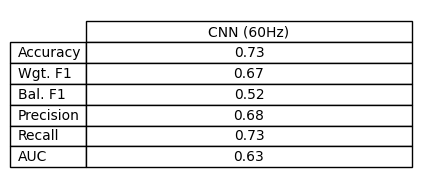

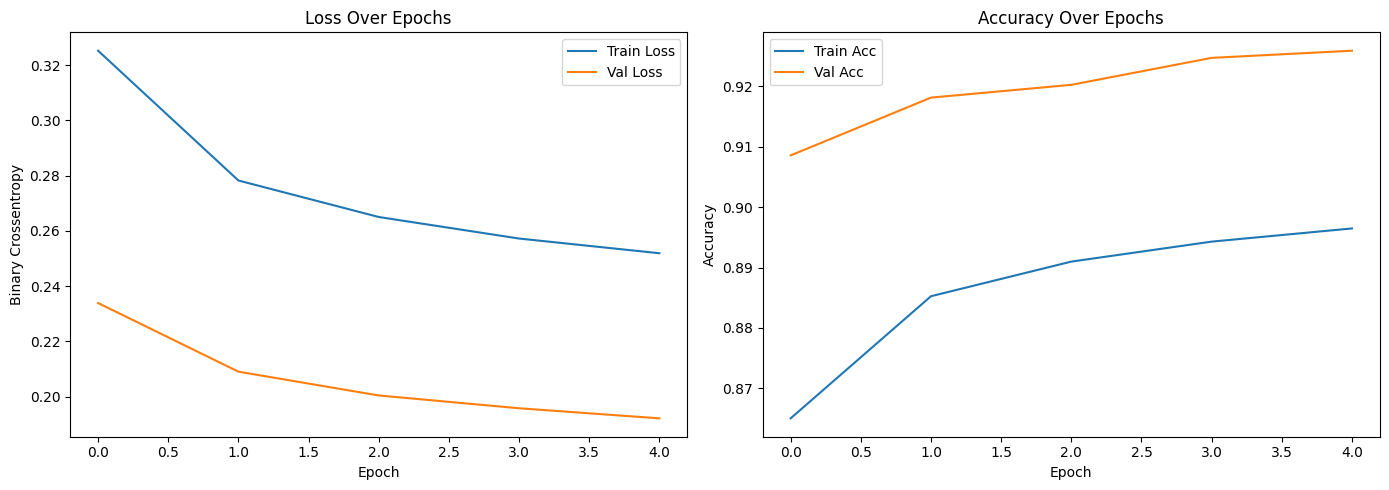

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# -----------------------------
# Load and preprocess data
# -----------------------------
train_path = "Classification_Combined_Data/S1_S2_train_data_60hz.csv"
test_path  = "Classification_Combined_Data/S1_S2_test_data_60hz.csv"
df = pd.read_csv(train_path)

# Drop 1back and 2back
df = df[~df['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])

# Binary label
df['binary_label'] = df['Label'].apply(lambda x: 1 if x in ['Slight', 'Moderate', 'Very'] else 0)

# Predictors and label
# features = ['EAR_mean_mean','MAR_inner_mean','MAR_outer_mean','AU01_r_mean','AU15_r_mean','AU25_r_mean','AU26_r_mean','AU45_r_mean','pose_Tx_mean','pose_Ty_mean','pose_Tz_mean','pose_Rx_mean','pose_Ry_mean','pose_Rz_mean','gaze_angle_x_mean','gaze_angle_y_mean','swAngle_mean','laneDevPosition_mean','laneDev_OffsetfrmLaneCentre_mean','speed_mean','EAR_mean_std','MAR_inner_std','MAR_outer_std','AU01_r_std','AU15_r_std','AU25_r_std','AU26_r_std','AU45_r_std','pose_Tx_std','pose_Ty_std','pose_Tz_std','pose_Rx_std','pose_Ry_std','pose_Rz_std','gaze_angle_x_std','gaze_angle_y_std','swAngle_std','laneDevPosition_std','laneDev_OffsetfrmLaneCentre_std','speed_std']
features = [
    "EAR_mean",
    "MAR_inner",
    "MAR_outer",
    "AU01_r",
    "AU15_r",
    "AU25_r",
    "AU26_r",
    "AU45_r",
    "pose_Tx",
    "pose_Ty",
    "pose_Tz",
    "pose_Rx",
    "pose_Ry",
    "pose_Rz",
    "gaze_angle_x",
    "gaze_angle_y",
    "swAngle",
    "laneDevPosition",
    "laneDev_OffsetfrmLaneCentre",
    "speed",
]

X= df[features]
y = df['binary_label'].values

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cnn = X_scaled.reshape(-1, X.shape[1], 1)

df_test = pd.read_csv(test_path)
df_test = df_test[~df_test['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])
df_test['binary_label'] = df_test['Label'].apply(lambda x: 1 if x in ['Slight', 'Moderate', 'Very'] else 0)
X_test_raw = df_test[features]
y_test = df_test['binary_label'].values
X_test_scaled = scaler.transform(X_test_raw)
X_test = X_test_scaled.reshape(-1, X_test_raw.shape[1], 1)

# Train/Val/Test Split
X_train, X_val, y_train, y_val = train_test_split(X_cnn, y, test_size=0.15, stratify=y, random_state=42)
X_test, y_test = X_test, y_test
# X_temp, X_test, y_temp, y_test = train_test_split(X_cnn, y, test_size=0.15, stratify=y, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# -----------------------------
# CNN Model Definition
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    BatchNormalization(),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),

    # Only one pooling layer
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# Train Model
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# -----------------------------
# Evaluation and Confusion Matrix
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Alert", "Drowsy"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# Summary Metrics Table (like screenshot)
# -----------------------------
y_proba = model.predict(X_test).reshape(-1)         # probabilities
y_pred_flat = y_pred.reshape(-1)                    # 0/1 preds
y_test_flat = np.array(y_test).reshape(-1)

acc = accuracy_score(y_test_flat, y_pred_flat)
wgt_f1 = f1_score(y_test_flat, y_pred_flat, average="weighted", zero_division=0)
bal_f1 = f1_score(y_test_flat, y_pred_flat, average="macro", zero_division=0)   # "balanced" ≈ macro-F1
wgt_prec = precision_score(y_test_flat, y_pred_flat, average="weighted", zero_division=0)
wgt_rec = recall_score(y_test_flat, y_pred_flat, average="weighted", zero_division=0)

# AUC only makes sense if both classes exist in y_test
try:
    auc = roc_auc_score(y_test_flat, y_proba) if len(np.unique(y_test_flat)) == 2 else None
except ValueError:
    auc = None

metrics = ["Accuracy", "Wgt. F1", "Bal. F1", "Precision", "Recall", "AUC"]
vals = [
    f"{acc:.2f}",
    f"{wgt_f1:.2f}",
    f"{bal_f1:.2f}",
    f"{wgt_prec:.2f}",
    f"{wgt_rec:.2f}",
    f"{auc:.2f}" if auc is not None else "—"
]

# Change column name if you want (screenshot uses "Dummy")
col_name = "CNN (60Hz)"

summary_df = pd.DataFrame({ "Metric": metrics, col_name: vals })
print("\nSummary Metrics:\n")
print(summary_df.to_string(index=False))

# Optional: show as a matplotlib table
fig, ax = plt.subplots(figsize=(4.2, 2.2))
ax.axis("off")
tbl = ax.table(
    cellText=summary_df[[col_name]].values,
    rowLabels=summary_df["Metric"].values,
    colLabels=[col_name],
    cellLoc="center",
    loc="center"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.25)
plt.show()

# -----------------------------
# Training Curves
# -----------------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50


/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1225/1225 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5889 - loss: 0.9003 - val_accuracy: 0.6959 - val_loss: 0.7207
Epoch 2/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6516 - loss: 0.7632 - val_accuracy: 0.7273 - val_loss: 0.6387
Epoch 3/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6768 - loss: 0.7144 - val_accuracy: 0.7471 - val_loss: 0.5825
Epoch 4/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6933 - loss: 0.6792 - val_accuracy: 0.7584 - val_loss: 0.5489
Epoch 5/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7078 - loss: 0.6529 - val_accuracy: 0.7709 - val_loss: 0.5320
Epoch 6/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7199 - loss: 0.6269 - val_accuracy: 0.7868 - val_loss: 0.5030
Epoch 7/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7242 - loss: 0.6093 - val_accuracy: 0.7925 - val_loss: 0.4854
Epoch 8/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7333 - loss: 0.5904 - val_accurac

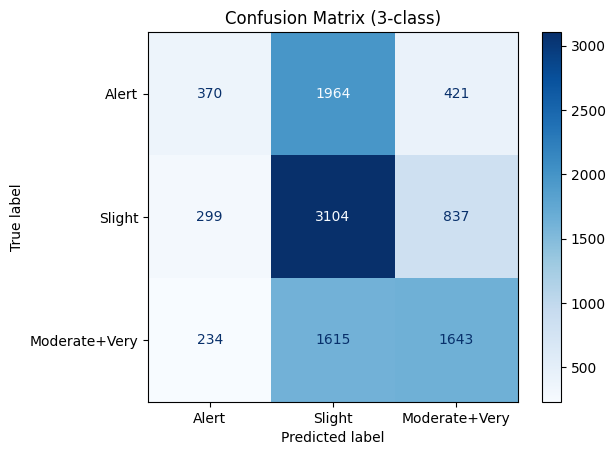


Summary Metrics:

   Metric Dummy
 Accuracy  0.49
  Wgt. F1  0.45
  Bal. F1  0.43
Precision  0.48
   Recall  0.49
      AUC  0.64


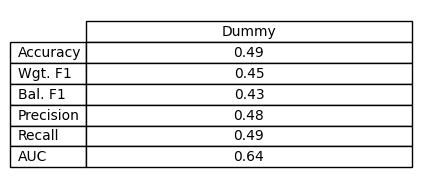

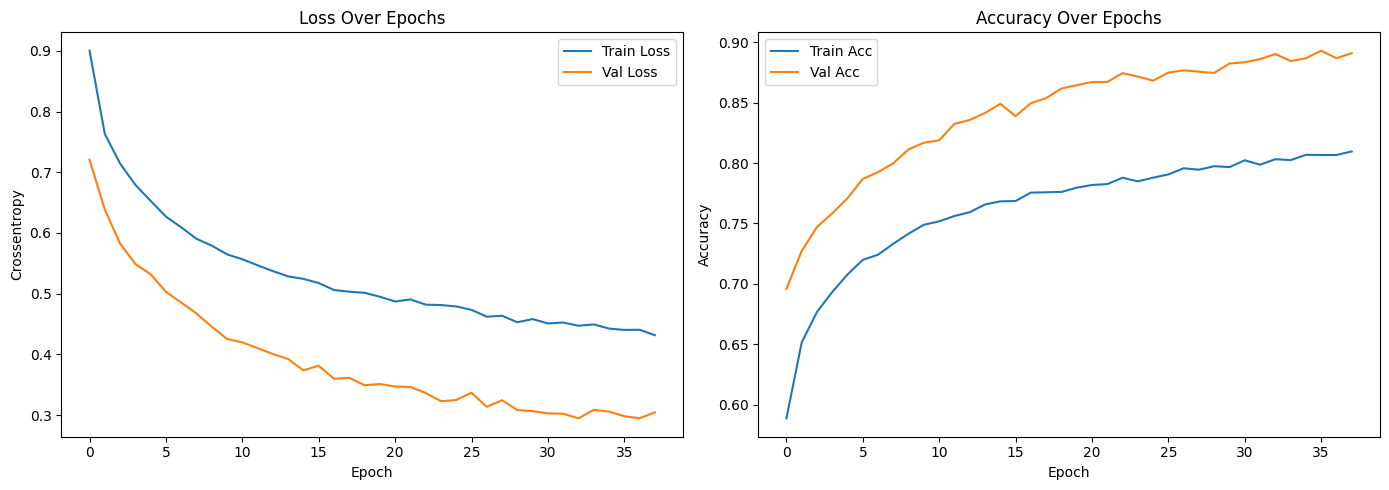

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# Load and preprocess data
# -----------------------------
train_path = "Classification_Combined_Data/S1_S2_train_data_15s.csv"
test_path  = "Classification_Combined_Data/S1_S2_test_data_15s.csv"

df = pd.read_csv(train_path)

# Drop 1back and 2back + missing labels
df = df[~df['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])

# Multiclass mapping: Not Drowsy vs Slight vs Moderate+Very
label_map = {
    "Not Drowsy": 0,
    "Slight": 1,
    "Moderate": 2,
    "Very": 2
}
df = df[df['Label'].isin(label_map.keys())].copy()
df['y_mc'] = df['Label'].map(label_map).astype(int)

# Predictors and label
features = [
    'EAR_mean_mean','MAR_inner_mean','MAR_outer_mean','AU01_r_mean','AU15_r_mean','AU25_r_mean','AU26_r_mean','AU45_r_mean',
    'pose_Tx_mean','pose_Ty_mean','pose_Tz_mean','pose_Rx_mean','pose_Ry_mean','pose_Rz_mean',
    'gaze_angle_x_mean','gaze_angle_y_mean','swAngle_mean','laneDevPosition_mean','laneDev_OffsetfrmLaneCentre_mean','speed_mean',
    'EAR_mean_std','MAR_inner_std','MAR_outer_std','AU01_r_std','AU15_r_std','AU25_r_std','AU26_r_std','AU45_r_std',
    'pose_Tx_std','pose_Ty_std','pose_Tz_std','pose_Rx_std','pose_Ry_std','pose_Rz_std',
    'gaze_angle_x_std','gaze_angle_y_std','swAngle_std','laneDevPosition_std','laneDev_OffsetfrmLaneCentre_std','speed_std'
]
X = df[features]
y = df['y_mc'].values

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cnn = X_scaled.reshape(-1, X.shape[1], 1)

# -----------------------------
# Load test data (same preprocessing)
# -----------------------------
df_test = pd.read_csv(test_path)
df_test = df_test[~df_test['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])
df_test = df_test[df_test['Label'].isin(label_map.keys())].copy()
df_test['y_mc'] = df_test['Label'].map(label_map).astype(int)

X_test_raw = df_test[features]
y_test = df_test['y_mc'].values
X_test_scaled = scaler.transform(X_test_raw)
X_test = X_test_scaled.reshape(-1, X_test_raw.shape[1], 1)

# Train/Val split (use stratify for multiclass)
X_train, X_val, y_train, y_val = train_test_split(
    X_cnn, y, test_size=0.15, stratify=y, random_state=42
)

# -----------------------------
# CNN Model (multiclass)
# -----------------------------
num_classes = 3

model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    BatchNormalization(),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),

    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# IMPORTANT: sparse_categorical_crossentropy expects integer labels 0..K-1
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Train
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# -----------------------------
# Evaluate + confusion matrix
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

probs = model.predict(X_test, verbose=0)               # shape (N, 3)
y_pred = np.argmax(probs, axis=1)

labels = ["Alert", "Slight", "Moderate+Very"]
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix (3-class)")
plt.show()

# -----------------------------
# Summary Metrics Table (multiclass, like screenshot)
# -----------------------------
acc = accuracy_score(y_test, y_pred)
wgt_f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
bal_f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)  # macro-F1

wgt_prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
wgt_rec  = recall_score(y_test, y_pred, average="weighted", zero_division=0)

# Multiclass AUC (one-vs-rest) if all classes appear in y_test
try:
    auc = roc_auc_score(y_test, probs, multi_class="ovr", average="weighted") if len(np.unique(y_test)) == num_classes else None
except ValueError:
    auc = None

metrics = ["Accuracy", "Wgt. F1", "Bal. F1", "Precision", "Recall", "AUC"]
vals = [
    f"{acc:.2f}",
    f"{wgt_f1:.2f}",
    f"{bal_f1:.2f}",
    f"{wgt_prec:.2f}",
    f"{wgt_rec:.2f}",
    f"{auc:.2f}" if auc is not None else "—"
]

col_name = "Dummy"  # rename if you want
summary_df = pd.DataFrame({ "Metric": metrics, col_name: vals })

print("\nSummary Metrics:\n")
print(summary_df.to_string(index=False))

# Optional: show as a matplotlib table
fig, ax = plt.subplots(figsize=(4.2, 2.2))
ax.axis("off")
tbl = ax.table(
    cellText=summary_df[[col_name]].values,
    rowLabels=summary_df["Metric"].values,
    colLabels=[col_name],
    cellLoc="center",
    loc="center"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.25)
plt.show()

# -----------------------------
# Training curves
# -----------------------------
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Crossentropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import os
import pandas as pd

# Paths
data_dir = 'Classification_Combined_Data/Combined_S1S2_clean'
os.makedirs('Classification_Combined_Data', exist_ok=True)

# Train/test splits
# train_ids = ['S1_P13', 'S1_P04', 'S1_P27', 'S2_P24', 'S1_P18', 'S2_P45', 'S1_P23', 'S2_P15', 'S1_P11', 'S1_P29', 
#              'S2_P30', 'S2_P35', 'S1_P33', 'S2_P29', 'S1_P21', 'S1_P20', 'S2_P04', 'S1_P16', 'S2_P17', 'S2_P19',
#              'S1_P34', 'S2_P44', 'S1_P12', 'S2_P27', 'S1_P08', 'S1_P03', 'S1_P14', 'S2_P42', 'S2_P31', 'S2_P21',
#              'S1_P32', 'S2_P18', 'S2_P46', 'S2_P37', 'S2_P28', 'S2_P36', 'S2_P38', 'S1_P24', 'S2_P32', 'S1_P26',
#              'S1_P28', 'S2_P26', 'S2_P33', 'S2_P23', 'S2_P43', 'S2_P34', 'S1_P07', 'S1_P05', 'S1_P17', 'S1_P09',
#              'S2_P09']

# test_ids = ['S2_P12', 'S1_P15', 'S1_P31', 'S2_P22', 'S1_P19', 'S2_P39', 'S2_P48', 'S1_P35', 'S2_P40', 'S2_P41',
#             'S2_P49', 'S1_P10', 'S2_P13']

train_ids= ['S1_P13', 'S1_P04', 'S1_P27', 'S2_P24', 'S1_P18', 'S2_P45', 'S1_P23',
'S2_P15', 'S1_P11', 'S1_P29', 'S2_P30', 'S2_P35', 'S1_P33', 'S2_P29', 'S1_P21', 'S1_P20',
#'S2_P04', #labels missing
'S1_P16', 'S2_P17', 'S2_P19', 'S1_P34', 'S2_P44', 'S1_P12', 'S2_P27', 'S1_P08', 'S1_P03',
'S1_P14', 'S2_P42', 'S2_P31', 'S2_P21', 'S1_P32', 'S2_P18', 'S2_P46', 'S2_P37',
'S2_P28', 'S2_P36', 'S2_P38', 'S1_P24', 'S2_P32', 'S1_P26', 'S1_P28', 'S2_P26', 'S2_P33', #'S2_P23', #labels missing
'S2_P43', 'S2_P34', 'S1_P07', 'S1_P05', 'S1_P17', 'S1_P09', 'S2_P09']
 
test_ids = ['S2_P12', 'S1_P15', 'S1_P31',
#'S2_P22', ## labels missing
'S1_P19', 'S2_P39', 'S2_P48', 'S1_P35', 'S2_P40',
'S2_P41', 'S2_P49', 'S1_P10', 'S2_P13']

# Features setup
selected_features = [
    'ID','Label_unify','UNIX',  # no 'Study' column in data
    'EAR_mean', 'MAR_inner', 'MAR_outer',
    'AU01_r', 'AU15_r', 'AU25_r', 'AU26_r', 'AU45_r',
    'pose_Tx', 'pose_Ty', 'pose_Tz',
    'pose_Rx', 'pose_Ry', 'pose_Rz',
    'gaze_angle_x', 'gaze_angle_y',
    'swAngle', 'laneDevPosition', 'laneDev_OffsetfrmLaneCentre', 'speed'
]
exclude_features = {'ID', 'UNIX', 'Label_unify'}

def process_file(file_path, file_id):
    df = pd.read_csv(file_path)

    print(f"\n🔍 Processing: {file_id}")

    # Step 1: Select usable features
    available_features = [col for col in selected_features if col in df.columns]
    df = df[available_features]
    print(f"✅ Available features: {available_features}")
    print(f"🧮 Rows after filter: {df.shape[0]}")

    if df.empty:
        return []

    # Step 2: Overlapping 30s windows with 15s stride
    results = []
    stride = 3
    window_size = 15
    start_time = df['UNIX'].min()
    end_time = df['UNIX'].max()
    current_start = start_time

    while current_start + window_size <= end_time:
        window_end = current_start + window_size
        group = df[(df['UNIX'] >= current_start) & (df['UNIX'] < window_end)]

        if group.shape[0] < 150:
            current_start += stride
            continue

        # Get label only if the window has a single consistent label
        if 'Label_unify' in group and group['Label_unify'].notna().any():
            unique_labels = group['Label_unify'].dropna().unique()
            if len(unique_labels) == 1:
                label = unique_labels[0]  # all rows share the same label
            else:
                current_start += stride  # skip this window entirely
                continue
        else:
            current_start += stride
            continue

        # Extract Study from file_id prefix (S1 or S2)
        study = file_id.split('_')[0]
        pid = group['ID'].iloc[0] if 'ID' in group and not group['ID'].isna().all() else None

        # Feature aggregation
        features = [col for col in group.columns if col not in exclude_features]
        means = group[features].mean().add_suffix('_mean').to_frame().T
        stds = group[features].std().add_suffix('_std').to_frame().T

        meta = pd.DataFrame({
            'window_start': [current_start],
            'ID': [pid],
            'Study': [study],
            'Label': [label]
        })

        row = pd.concat([meta.reset_index(drop=True), means.reset_index(drop=True), stds.reset_index(drop=True)], axis=1)
        results.append(row)

        current_start += stride

    print(f"🪟 Valid windows: {len(results)}")
    return results

# Master processing
train_df_list = []
test_df_list = []

for file in os.listdir(data_dir):
    if not file.endswith(".csv"):
        continue

    file_id = file.replace(".csv", "")
    file_path = os.path.join(data_dir, file)
    window_dfs = process_file(file_path, file_id)

    for row_df in window_dfs:
        if file_id in train_ids:
            train_df_list.append(row_df)
        elif file_id in test_ids:
            test_df_list.append(row_df)

# Final merge
train_df = pd.concat(train_df_list, ignore_index=True)
test_df = pd.concat(test_df_list, ignore_index=True)

# Final info
print(f"\n✅ Final TRAIN shape: {train_df.shape}")
print(f"✅ Final TEST shape: {test_df.shape}")
print("📊 Train columns:", train_df.columns.tolist())

# Save output
train_df.to_csv('Classification_Combined_Data/S1_S2_train_data_15s.csv', index=False)
test_df.to_csv('Classification_Combined_Data/S1_S2_test_data_15s.csv', index=False)


🔍 Processing: S1_P05
✅ Available features: ['ID', 'Label_unify', 'UNIX', 'EAR_mean', 'MAR_inner', 'MAR_outer', 'AU01_r', 'AU15_r', 'AU25_r', 'AU26_r', 'AU45_r', 'pose_Tx', 'pose_Ty', 'pose_Tz', 'pose_Rx', 'pose_Ry', 'pose_Rz', 'gaze_angle_x', 'gaze_angle_y', 'swAngle', 'laneDevPosition', 'laneDev_OffsetfrmLaneCentre', 'speed']
🧮 Rows after filter: 59739
🪟 Valid windows: 1940

🔍 Processing: S1_P11
✅ Available features: ['ID', 'Label_unify', 'UNIX', 'EAR_mean', 'MAR_inner', 'MAR_outer', 'AU01_r', 'AU15_r', 'AU25_r', 'AU26_r', 'AU45_r', 'pose_Tx', 'pose_Ty', 'pose_Tz', 'pose_Rx', 'pose_Ry', 'pose_Rz', 'gaze_angle_x', 'gaze_angle_y', 'swAngle', 'laneDevPosition', 'laneDev_OffsetfrmLaneCentre', 'speed']
🧮 Rows after filter: 48310
🪟 Valid windows: 1582

🔍 Processing: S1_P10
✅ Available features: ['ID', 'Label_unify', 'UNIX', 'EAR_mean', 'MAR_inner', 'MAR_outer', 'AU01_r', 'AU15_r', 'AU25_r', 'AU26_r', 'AU45_r', 'pose_Tx', 'pose_Ty', 'pose_Tz', 'pose_Rx', 'pose_Ry', 'pose_Rz', 'gaze_angle_x'

In [1]:
import os
import pandas as pd

data_dir = "Classification_Combined_Data/Combined_S1S2_clean"
os.makedirs("Classification_Combined_Data", exist_ok=True)

train_ids= ['S1_P13','S1_P04','S1_P27','S2_P24','S1_P18','S2_P45','S1_P23','S2_P15','S1_P11','S1_P29',
            'S2_P30','S2_P35','S1_P33','S2_P29','S1_P21','S1_P20','S1_P16','S2_P17','S2_P19','S1_P34',
            'S2_P44','S1_P12','S2_P27','S1_P08','S1_P03','S1_P14','S2_P42','S2_P31','S2_P21','S1_P32',
            'S2_P18','S2_P46','S2_P37','S2_P28','S2_P36','S2_P38','S1_P24','S2_P32','S1_P26','S1_P28',
            'S2_P26','S2_P33','S2_P43','S2_P34','S1_P07','S1_P05','S1_P17','S1_P09','S2_P09']

test_ids = ['S2_P12','S1_P15','S1_P31','S1_P19','S2_P39','S2_P48','S1_P35','S2_P40','S2_P41','S2_P49','S1_P10','S2_P13']

selected_features = [
    'ID','Label_unify','UNIX',
    'EAR_mean','MAR_inner','MAR_outer',
    'AU01_r','AU15_r','AU25_r','AU26_r','AU45_r',
    'pose_Tx','pose_Ty','pose_Tz',
    'pose_Rx','pose_Ry','pose_Rz',
    'gaze_angle_x','gaze_angle_y',
    'swAngle','laneDevPosition','laneDev_OffsetfrmLaneCentre','speed'
]

def process_file_no_windows(file_path, file_id):
    df = pd.read_csv(file_path)

    # keep only columns that exist
    available = [c for c in selected_features if c in df.columns]
    df = df[available].copy()
    if df.empty:
        return None

    # drop rows with missing label
    if "Label_unify" not in df.columns:
        return None
    df = df[df["Label_unify"].notna()].copy()
    if df.empty:
        return None

    # add Study from filename prefix
    df["Study"] = file_id.split("_")[0]  # S1 or S2

    # standardize label column name to "Label" (matches your downstream code)
    df = df.rename(columns={"Label_unify": "Label"})

    return df

train_parts, test_parts = [], []

for file in os.listdir(data_dir):
    if not file.endswith(".csv"):
        continue

    file_id = file.replace(".csv", "")
    file_path = os.path.join(data_dir, file)

    df_proc = process_file_no_windows(file_path, file_id)
    if df_proc is None:
        continue

    if file_id in train_ids:
        train_parts.append(df_proc)
    elif file_id in test_ids:
        test_parts.append(df_proc)

train_df = pd.concat(train_parts, ignore_index=True) if train_parts else pd.DataFrame()
test_df  = pd.concat(test_parts, ignore_index=True)  if test_parts  else pd.DataFrame()

print(f"✅ Final TRAIN shape: {train_df.shape}")
print(f"✅ Final TEST shape: {test_df.shape}")

train_df.to_csv("Classification_Combined_Data/S1_S2_train_data_60hz.csv", index=False)
test_df.to_csv("Classification_Combined_Data/S1_S2_test_data_60hz.csv", index=False)

✅ Final TRAIN shape: (1427849, 24)
✅ Final TEST shape: (324261, 24)
